In [10]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 11장 시계열(time series)
* 금융, 경제, 생태학, 신경 과학, 서버 로그 데이터 분석 등 분야에서 사용되는 구조화된 데이터
* 시간상의 여러 지점을 관측하거나 측정할수 있는 모든 것
* 시간 내에서 특정 순간의 타임스탬프로 색인된 데이터

## 1. datetime 모듈의 자료형
* datetime: 날짜와 시간을 함께 나타내는 자료형
* date: 날짜(연, 월, 일)만을 나타내는 자료형
* time: 시간만을 나타내는 자료형
* timedelta: 두 날짜 또는 시간 사이의 차이를 나타내는 자료형



## 2. datetime의 속성
* year: 년도
* month: 월
* day: 일
* hour: 시간
* minute: 분
* second: 초
* microsecond: 마이크로초

## 3. datetime 자료형의 메서드
* now(): 현재 날짜와 시간을 반환
* today(): 오늘 날짜를 반환

In [11]:
# ex 1 : 사용법
from datetime import datetime
now = datetime.now()
# type(now)
now

datetime.datetime(2024, 5, 8, 16, 18, 37, 752400)

In [12]:
# ex2 : datetime 객체에서 연, 월, 일 정보 추출(!!!!)
print(now.year)
print(now.month)
print(now.day)

2024
5
8


## 4. timedelta 자료형의 속성
* days: 일
* seconds: 초
* microseconds: 마이크로초

In [13]:
delta =  datetime.now() - datetime(2024, 1, 1)
delta.days

128

## 5. datetime 포맷 규칙
* %Y: 년도 (4자리)
* %m: 월 (2자리)
* %d: 일 (2자리)
* %H: 시간 (24시간제, 2자리)
* %M: 분 (2자리)
* %S: 초 (2자리)


In [17]:
#ex1> datetime객체 -> 문자열 datetime 객체로 변환
stamp = datetime(2024, 5, 6)
print(stamp)
print(type(stamp))


str(stamp)

stamp.strftime("%Y-%m-%d")

2024-05-06 00:00:00
<class 'datetime.datetime'>


'2024-05-06'

## 6. 시계열의 종류
* datetime 객체로 표현되는 타임스템프로 색인된 Series

In [15]:
#ex1: 문자열 -> datetime 날짜로 파싱
value = "2011-01-03"
dt = datetime.strptime(value, "%Y-%m-%d")
type(dt)


datetime.datetime

In [18]:
# ex2> 날짜 문자열 리스트 -> datetime 객체으로 파싱
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
dt = pd.to_datetime(datestrs)
dt # DatetimeIndex 객체(중요!!)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
#ex>인덱싱


## 7. 시계열의 색인, 선택, 부분 선택


In [19]:
# (1) datetime 타임스템프로 색인된 Series 객체 생성
dates = [datetime(2024, 5, 2), datetime(2024, 5, 5),
         datetime(2023, 1, 7), datetime(2011, 1, 8),
         datetime(2022, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2024-05-02   -0.204708
2024-05-05    0.478943
2023-01-07   -0.519439
2011-01-08   -0.555730
2022-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [20]:
ts.index # DatetimeIndex

DatetimeIndex(['2024-05-02', '2024-05-05', '2023-01-07', '2011-01-08',
               '2022-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
# 첫 번째 샘플 추출 : 인덱싱 
stamp = ts.index[0]
ts[stamp]

-0.20470765948471295

In [22]:
# 인덱싱 : DatetimeIndex 의 색인 레벨
ts["2024-05-02"]

-0.20470765948471295

In [23]:
# 슬라이싱
ts[::2]


2024-05-02   -0.204708
2023-01-07   -0.519439
2022-01-10    1.965781
dtype: float64

### [실습] 가상 시계열 데이터 생성
* pandas.date_range()  
  * pandas 라이브러리의 함수로, 특정 기간 내의 날짜 범위를 생성
  * start: 시작 날짜
  * end: 종료 날짜
  * periods: 생성할 날짜 수
  * freq: 날짜 간격 (기본값: 'D' (하루))

In [26]:
# ex> 시계열 데이터프레임 생성(!!)
np.random.seed(1)
dates = pd.date_range("2000-01-01", periods=10, freq="W-WED")
#dates
long_df = pd.DataFrame(np.random.standard_normal((10, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df
#인덱싱
long_df.loc["2000-01"]
#슬라이싱
long_df.iloc[:5:2]

,Colorado,Texas,New York,Ohio
2000-01-05,1.624345,-0.611756,-0.528172,-1.072969
2000-01-19,0.319039,-0.249370,1.462108,-2.060141
2000-02-02,-0.172428,-0.877858,0.042214,0.582815


In [ ]:
long_df.index

In [ ]:
long_df.index.year1

In [ ]:
# 1) grouping
grouped = long_df.groupby(level=0) 
# 각 그룹별 이름과 데이터을 출력
for n, g in grouped:
  print(f"name : {n}")
  print(g)
  print()


In [ ]:
# groupby()에 의한 메서드 
grouped.mean()
grouped.count() 
grouped.size()

## [실습] 시계열 데이터셋 로딩

In [27]:
# ex > 시계열 데이터셋 파일 -> 시계열 색인을 갖는 데이터프레임 객체로 변환
#단일 데이터프레임의 첫 번째 시계열 컬럼 -> DatetimeIndex 생성
##index_col = 0
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates= True, index_col= 0)

# close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates = True, index_col = 0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [28]:
close_px_all.columns  # AAPL: Apple Inc, MSFT: Microsoft Corporation, XOM: Exxon Mobil Corporation, SPX: S&P 500 Index


Index(['AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [29]:
# 인덱싱
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


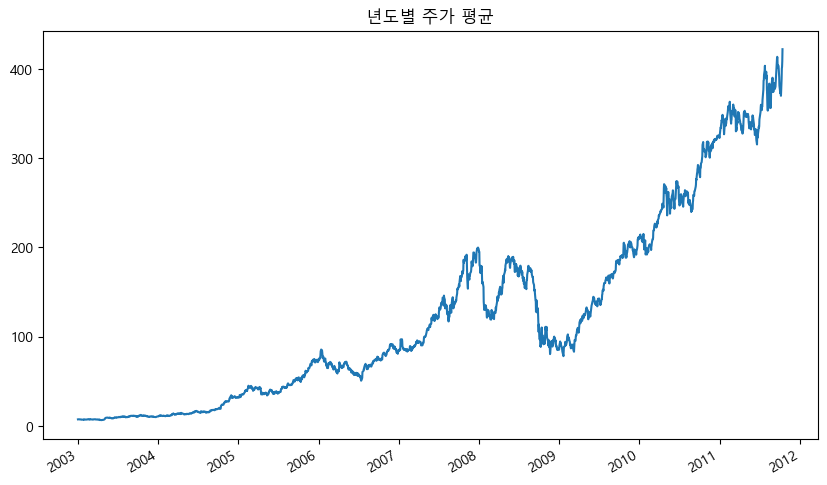

In [30]:
# 시각화 방법 
# (1) line plots
close_px["AAPL"].plot(kind='line')

plt.title("년도별 주가 평균")
plt.show()

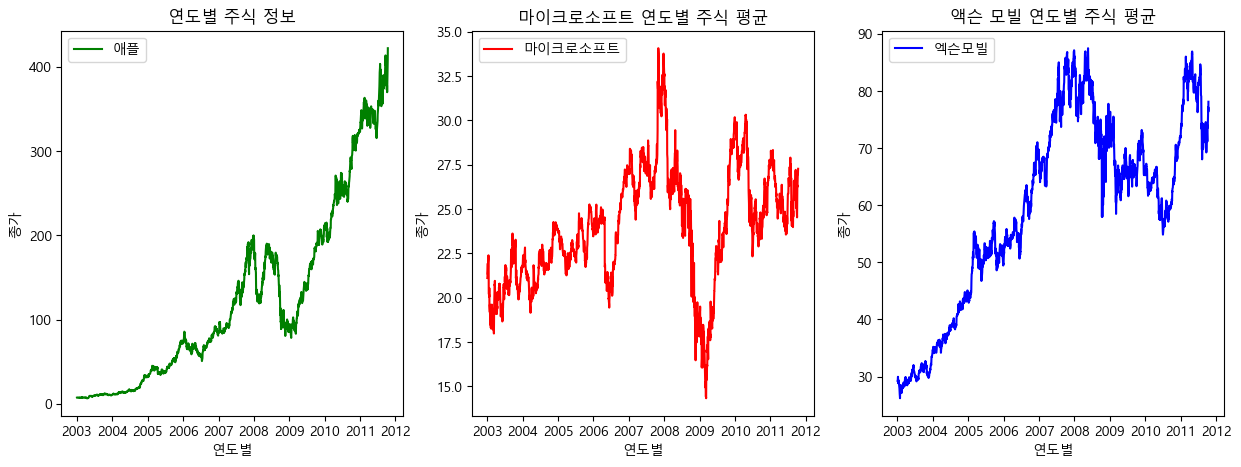

In [39]:
#하나의 도화지에 세 종류의 그래프 그리기
fig, axes = plt.subplots(1,3, figsize = (15,5))

axes[0].plot(close_px["AAPL"], color="green", label = "애플")
axes[1].plot(close_px["MSFT"], color="red", label = "마이크로소프트")
axes[2].plot(close_px["XOM"], color="blue", label = "엑슨모빌")

axes[0].set_title("연도별 주식 정보")
axes[1].set_title("마이크로소프트 연도별 주식 평균")
axes[2].set_title("액슨 모빌 연도별 주식 평균")

axes[0].set_xlabel("연도별")
axes[1].set_xlabel("연도별")
axes[2].set_xlabel("연도별")

axes[0].set_ylabel("종가")
axes[1].set_ylabel("종가")
axes[2].set_ylabel("종가")

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

### < pandas.rolling() 메서드>!!!!!!
* pandas 라이브러리의 함수로, 특정 기간 동안의 데이터를 그룹화하여 통계를 계산
* 롤링창은 시계열 데이터 분석에 매우 중요
* 롤링창을 사용하여 데이터 변화 추세, 변동성 측정, 이상치 감지, 예측에 사용
* 롤링창을 사용하여 롤링창 내의 데이터 평균, 표준편차, 최대값/최소값, 회귀분석 등
* rolling() 함수의 인자:
  * window: 그룹화할 데이터의 수
  * min_periods: 계산에 포함할 최소 데이터 수 (기본값: window)
  * center: 그룹화할 데이터의 중심을 맞출지 여부 (기본값: False)
  * win_type: 그룹화할 데이터의 가중치 (기본값: None)


2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    346.53988
2011-10-11    346.93180
2011-10-12    347.28160
2011-10-13    347.64332
2011-10-14    348.09336
Name: AAPL, Length: 2214, dtype: float64


<Axes: >

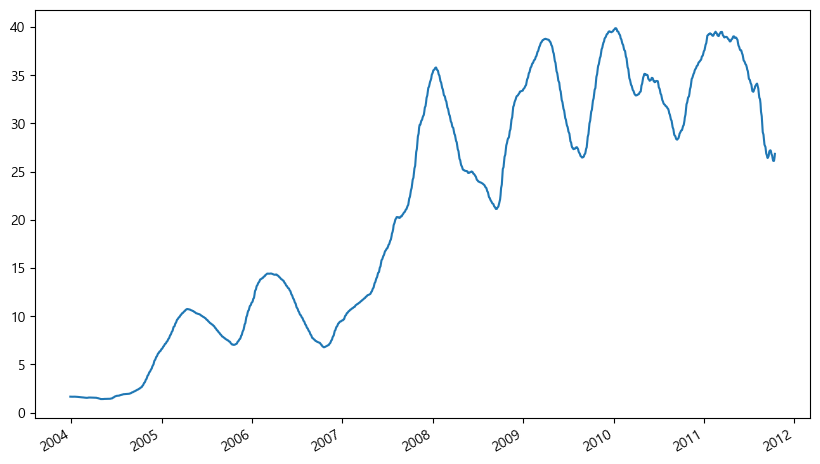

In [42]:
# (1)  롤링창 만들어 통계 계산
# DataFrame의 "AAPL" 열에 대한 rolling() 메서드를 사용하여 크기가 250인 롤링 창을 만드는 방법:
# 롤링 창 사용하기: 롤링 창을 만들면 다양한 통계 함수를 사용하여 창 내의 데이터를 분석:
print(close_px["AAPL"].rolling(250).mean())
# line plots
plt.figure() # 도화지 1개에 그림 1개 그리기
close_px["AAPL"].rolling(250).std().plot(kind="line")
# plt.show()


<Axes: >

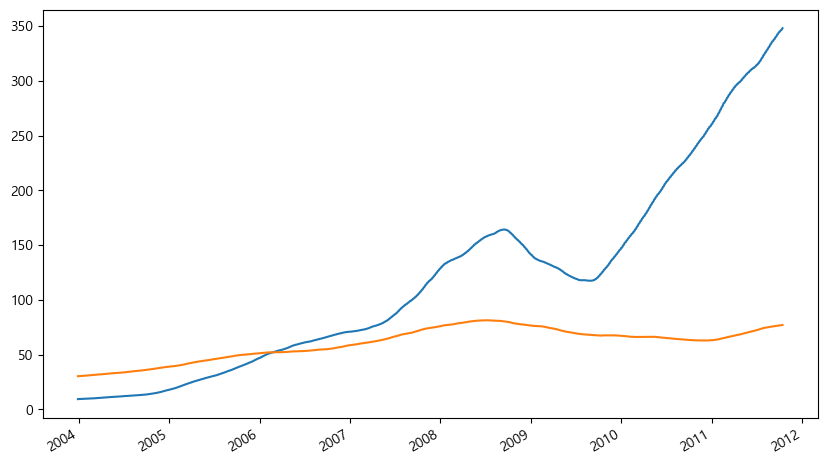

In [43]:
# (2) 롤링창 만들어 통계 계산 - 2 개의 종가에 대한 250일 롤링 평균 계산
plt.figure()
close_px["AAPL"].rolling(window = 250).mean().plot()
close_px["XOM"].rolling(window = 250).mean().plot()


NameError: name 'ewma30' is not defined

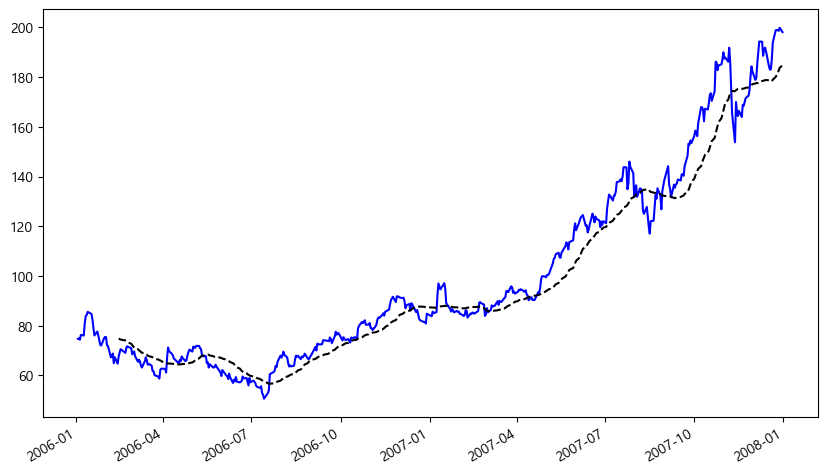

In [44]:
# # Create a figure
plt.figure()
# Select the desired date range for AAPL stock prices
aapl_px = close_px["AAPL"]["2006":"2007"]
# Calculate the 30-day simple moving average
ma30 = aapl_px.rolling(30).mean()
# Plot the AAPL stock prices : sets the line style to solid (-) and the color to blue (b).
aapl_px.plot(style="b-", label="Price")
# Plot the 30-day simple moving average
ma30.plot(style="k--", label="Simple Moving Avg")
# Plot the 30-day exponential moving average
ewma30.plot(style="k-", label="EW MA")
plt.legend()
plt.show()